<a href="https://colab.research.google.com/github/Cepera90/test/blob/main/test_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [2]:
# Open inc_points_2
TP = pd.read_csv("/content/drive/MyDrive/test/inc_points_2.csv")

In [3]:
# Open OS token
OS = pd.read_csv("/content/drive/MyDrive/test/os.csv")

In [4]:
# Open rich_tracks_2
RT = pd.read_csv("/content/drive/MyDrive/test/rich_tracks_2.csv")

In [5]:
# Create DF with ID and device token
ID_t = pd.DataFrame({'IncomingTrackId':RT['IncomingTrackId'],'TrackOrigin':RT['TrackOrigin'],'DeviceToken':RT['DeviceToken']})

In [6]:
# Merge ID_t with OS
ID_OS = pd.merge(ID_t, OS, on='DeviceToken')
ID_OS = ID_OS.drop('DeviceToken', axis=1)

In [7]:
# Merge ID_OS with TP
TP_OS = pd.merge(TP, ID_OS, on='IncomingTrackId')

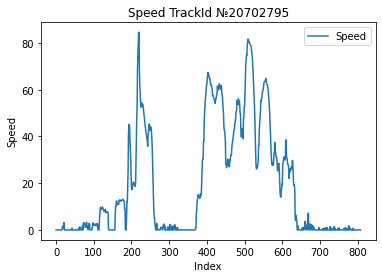

In [ ]:
# iOS track 20702795
TP_iOS_20702795 = TP_OS.query("IncomingTrackId == 20702795")
TP_iOS_20702795.loc[:,['Speed','PointDate']].plot(title='Speed TrackId №20702795',
                                                  xlabel='Index', ylabel='Speed')

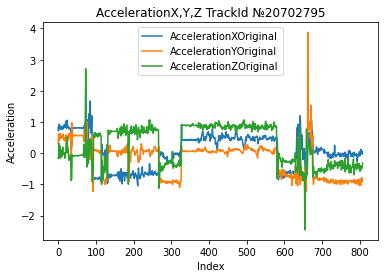

In [ ]:
TP_iOS_20702795.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №20702795',
                                                  xlabel='Index', ylabel='Acceleration')

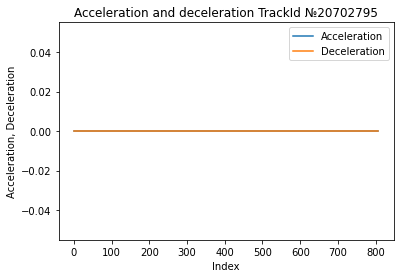

In [ ]:
TP_iOS_20702795.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №20702795',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
RT.query("IncomingTrackId == 20702795")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
0,5148865,AB70A2A9-B45C-453D-B07C-C2D9E9D7442B,3E045058-A9A5-4442-A2CC-605B871C4B2C,20702795,2019-10-17 15:35:34.0000000 +03:00,2019-10-17 15:46:05.0000000 +03:00,4.203323,10.516667,2,1,1.45,1.316667,OriginalDriver,False,"Тойминская улица 11А, Менделеевск, Менделеевск...","Сосновая улица 4, Менделеевск, Менделеевский р...",4.096,True,Республика Татарстан,Россия,0.0,2.5,5.0,5.0,0.65,0.818,0.812,NaN,1061,0.0,0.0,10.516666,3.75,0.2,0.8,1.0,0.875,84.599998,38.704914,0.033333,0.789,0.045,1.0,NaN,100.0,100.0,100.0,100.0,100.000008,0.0,Менделеевский район,Менделеевский район,2019-10-17 15:01:40.393,1.0,1.0,111.0,6.0,120.0,7.0,NaN,NaN,NaN,0.0,7.390443


Track 20702795 - iOS, Acceleration, Deceleration have zero values although
AccelerationCount and DecelerationCount not zero.
TrackOrigin - OriginalDriver, OriginalTrackOrigin -NaN.

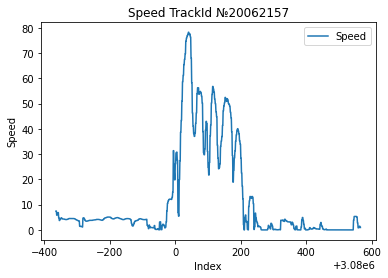

In [ ]:
# iOS track 20062157
TP_iOS_20062157 = TP_OS.query("IncomingTrackId == 20062157")
TP_iOS_20062157.loc[:,['Speed']].plot(title='Speed TrackId №20062157',
                                                  xlabel='Index', ylabel='Speed')

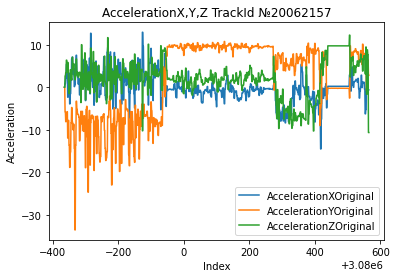

In [ ]:
TP_iOS_20062157.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №20062157',
                                                  xlabel='Index', ylabel='Acceleration')

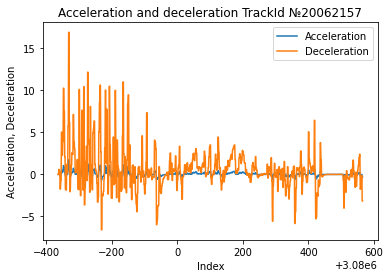

In [ ]:
TP_iOS_20062157.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №20062157',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
TP_iOS_20062157.loc[:,['Acceleration','Deceleration','AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].describe()

,Acceleration,Deceleration,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,930.000000,930.000000,930.000000,930.000000,930.000000
mean,0.066475,0.652123,0.037104,1.813959,2.143998
std,0.270324,2.651875,3.398319,8.759745,4.383680
min,-0.673012,-6.602248,-14.518883,-33.555763,-10.659311
25%,-0.041209,-0.404261,-1.510787,-6.047938,0.512375
50%,0.022594,0.221651,-0.213090,6.256240,2.236253
75%,0.124601,1.222337,1.508393,9.440625,4.221107
max,1.724587,16.918199,12.936267,10.764660,12.261082


In [ ]:
RT.query("IncomingTrackId == 20062157")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
2705,5098633,4E830A74-B7C7-4D20-8EF0-2FFC8B1BD66D,D525DD98-9308-4D5A-8398-15537783E9C4,20062157,2019-10-12 23:10:39.0000000 +11:00,2019-10-12 23:17:31.0000000 +11:00,2.207773,6.866667,0,0,4.0,0.0,Passanger,True,"McDonalds Rd 300, South Morang, Melbourne, Aus...","Bugatti Ct 16, Mill Park, Melbourne, Australia",2.197,True,NaN,Australia,4.0,5.0,5.0,5.0,0.543,0.26,0.0,OriginalDriver,3129,0.0,0.0,6.866667,5.0,NaN,NaN,NaN,NaN,77.305702,31.093092,0.0,0.0,0.0,NaN,NaN,100.0,100.0,100.0,50.0,85.000008,0.0,Melbourne,Melbourne,2019-10-12 20:49:37.623,0.0,0.0,22.0,5.0,76.0,19.0,5.0,NaN,NaN,0.0,27.379586


Track 20062157 - iOS, Acceleration, Deceleration have not zero values although
AccelerationCount and DecelerationCount zero.
TrackOrigin - Passanger, OriginalTrackOrigin - OriginalDriver.

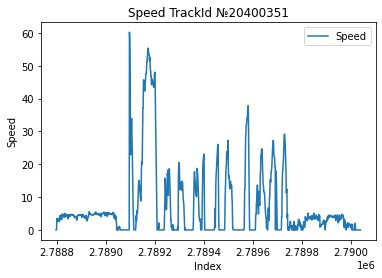

In [ ]:
# iOS track 20400351
TP_iOS_20400351 = TP_OS.query("IncomingTrackId == 20400351")
TP_iOS_20400351.loc[:,['Speed']].plot(title='Speed TrackId №20400351',
                                                  xlabel='Index', ylabel='Speed')

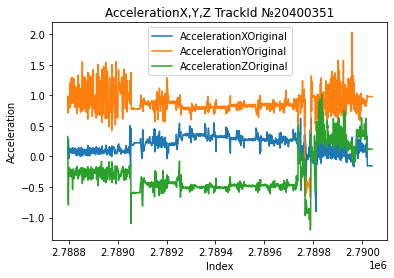

In [ ]:
TP_iOS_20400351.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №20400351',
                                                  xlabel='Index', ylabel='Acceleration')

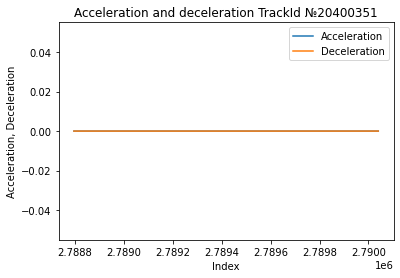

In [ ]:
TP_iOS_20400351.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №20400351',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
RT.query("IncomingTrackId == 20400351")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
2060,5125859,BA51A096-0639-48BC-AE6C-F779D27EB0AB,CA17578E-48C4-49ED-903B-977EE9A013C7,20400351,2019-10-15 13:28:59.0000000 +03:00,2019-10-15 13:47:35.0000000 +03:00,3.144821,18.6,0,1,4.75,0.0,Taxi,True,"Левобережная улица 1А, Кировский район, Ростов...","улица Суворова 117, Кировский район, Ростов-на...",3.375,True,Ростовская область,Россия,5.0,5.0,5.0,5.0,0.0,0.0,0.0,OriginalDriver,1061,0.0,0.0,18.6,3.75,1.0,1.0,1.0,0.875,59.039997,18.565179,0.0,0.0,0.0,1.0,NaN,100.0,100.0,100.0,100.0,100.000008,0.0,Ростов-на-Дону,Ростов-на-Дону,2019-10-15 11:10:26.287,0.0,0.0,0.0,9.0,0.0,11.0,NaN,NaN,NaN,0.0,31.986093


Track 20400351 - iOS, Acceleration, Deceleration have zero values although DecelerationCount  not zero. TrackOrigin - Taxi, OriginalTrackOrigin - OriginalDriver.

In [ ]:
TP_OS.query("TrackOrigin != 'Passanger' & os_version == 'iOS' & Acceleration != 0")

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal,TrackOrigin,os_version


In [ ]:
TP_OS.query("TrackOrigin != 'Passanger' & os_version == 'iOS' & Deceleration != 0")

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal,TrackOrigin,os_version


iOS Acceleration and Deceleration not zero have only passanger

In [ ]:
TP_OS.query("OriginalTrackOrigin == 'Walking' &  Deceleration != 0")

,IncomingTrackId,Speed,Latitude,Longitude,PointDate,Height,Acceleration,Deceleration,TickTimestamp,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal,OriginalTrackOrigin,TrackOrigin,os_version


OriginalTrackOrigin == Walking have zero Deceleration and Acceleration

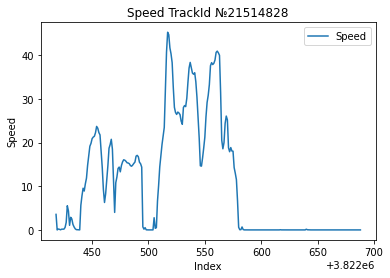

In [ ]:
# Android track 21514828
TP_A_21514828 = TP_OS.query("IncomingTrackId == 21514828")
TP_A_21514828.loc[:,['Speed']].plot(title='Speed TrackId №21514828',
                                                  xlabel='Index', ylabel='Speed')

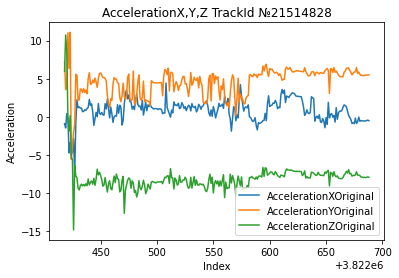

In [ ]:
TP_A_21514828.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №21514828',
                                                  xlabel='Index', ylabel='Acceleration')

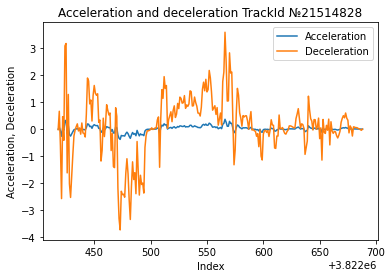

In [ ]:
TP_A_21514828.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №21514828',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
TP_A_21514828.loc[:,['Acceleration','Deceleration','AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].describe()

,Acceleration,Deceleration,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,271.000000,271.000000,271.000000,271.000000,271.000000
mean,0.012499,0.122619,0.817916,4.566511,-7.975607
std,0.112108,1.099781,1.422133,1.841223,2.155643
min,-0.380511,-3.732811,-7.575254,-5.592855,-14.824897
25%,-0.016545,-0.162306,-0.038307,3.529053,-8.820239
50%,0.012269,0.120362,1.024718,5.152322,-8.025364
75%,0.069032,0.677205,1.608904,5.779603,-7.627927
max,0.365830,3.588794,4.424485,11.089942,10.726024


In [ ]:
RT.query("IncomingTrackId == 21514828")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
3999,5201839,A70AD579-AEF8-4173-A324-631A82019735,55D0C3A4-9E5B-4B57-BC22-E986158707F8,21514828,2019-10-23 12:32:24.0000000 +04:00,2019-10-23 12:32:04.0000000 +04:00,1.144486,-0.333333,0,0,3.9,0.0,Passanger,True,"улица Мира 68, Волжский, Волгоградская область...","улица Мира 53Ж, Волжский, Волгоградская област...",1.27,True,Волгоградская область,Россия,3.05,5.0,5.0,5.0,0.112,0.075,0.0,OriginalDriver,1061,0.0,0.0,1.133333,5.0,0.61,1.0,1.0,1.0,45.280136,23.094393,0.0,0.0,0.0,1.0,NaN,100.0,100.0,100.0,100.0,100.000008,0.0,Волжский,Волжский,2019-10-23 08:39:17.480,0.0,0.0,0.0,3.0,0.0,0.0,NaN,NaN,NaN,0.0,9.652287


Track 21514828 - Android, Acceleration, Deceleration have not zero values although
AccelerationCount and DecelerationCount zero.
TrackOrigin - Passanger.

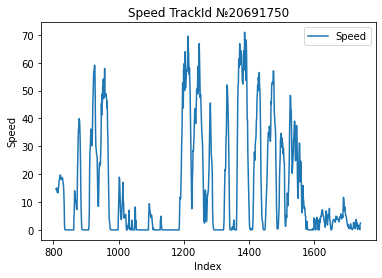

In [8]:
# Android track 20691750
TP_A_20691750 = TP_OS.query("IncomingTrackId == 20691750")
TP_A_20691750.loc[:,['Speed']].plot(title='Speed TrackId №20691750',
                                                  xlabel='Index', ylabel='Speed')

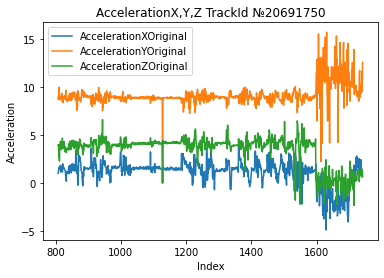

In [9]:
TP_A_20691750.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №20691750',
                                                  xlabel='Index', ylabel='Acceleration')

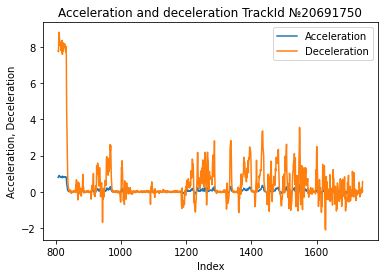

In [10]:
TP_A_20691750.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №20691750',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
TP_A_20691750.loc[:,['Acceleration','Deceleration','AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].describe()

,Acceleration,Deceleration,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,934.000000,934.000000,934.000000,934.000000,934.000000
mean,0.052919,0.519136,1.151694,9.178990,3.448931
std,0.150749,1.478849,1.232896,1.179172,1.532892
min,-0.215925,-2.118221,-4.881777,0.000000,-2.331953
25%,-0.003991,-0.039149,0.990601,8.777443,3.541623
50%,0.004596,0.045084,1.449689,8.942942,4.015076
75%,0.067716,0.664290,1.692701,9.252093,4.222175
max,0.900146,8.830428,3.786430,15.699978,6.591237


In [ ]:
RT.query("IncomingTrackId == 20691750")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
1,5148032,4BDD2EE6-FF53-4762-83DA-35A849935A99,669AFC5F-921C-40B9-B090-587BC95D34C2,20691750,2019-10-17 17:35:30.0000000 +05:00,2019-10-17 18:00:56.0000000 +05:00,414.0765,25.433333,0,1,4.75,0.0,OriginalDriver,False,"улица Труда 166/1, Центральный район, Челябинс...","улица Блюхера 69А, Советский район, Челябинск,...",6.233,True,Челябинская область,Россия,5.0,5.0,4.993904,5.0,0.608,0.0,0.0,NaN,1061,1.033333,0.0,24.4,3.75,1.0,1.0,1.0,0.875,70.91703,27.351787,0.0,0.0,0.0,1.0,NaN,100.0,100.0,100.0,75.0,92.5,0.0,Челябинск,Челябинск,2019-10-17 13:06:47.537,0.0,0.0,16.0,0.0,29.0,0.0,NaN,NaN,NaN,0.0,17.956039


Track 21514828 - Android, Acceleration, Deceleration have not zero values although AccelerationCount zero. TrackOrigin - OriginalDriver.

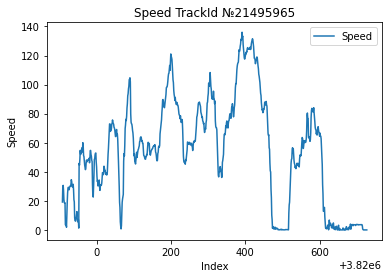

In [11]:
# Android track 21495965
TP_A_21495965 = TP_OS.query("IncomingTrackId == 21495965")
TP_A_21495965.loc[:,['Speed']].plot(title='Speed TrackId №21495965',
                                                  xlabel='Index', ylabel='Speed')

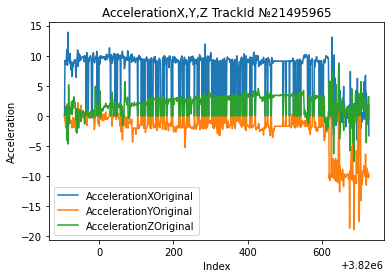

In [12]:
TP_A_21495965.loc[:,['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].plot(title='AccelerationX,Y,Z TrackId №21495965',
                                                  xlabel='Index', ylabel='Acceleration')

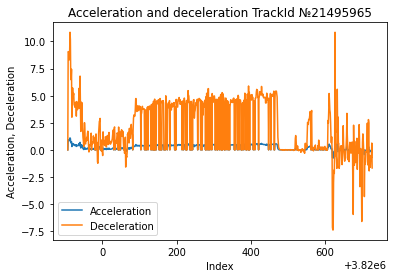

In [13]:
TP_A_21495965.loc[:,['Acceleration','Deceleration']].plot(title='Acceleration and deceleration TrackId №21495965',
                                                  xlabel='Index', ylabel='Acceleration, Deceleration')

In [ ]:
TP_A_21495965.loc[:,['Acceleration','Deceleration','AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']].describe()

,Acceleration,Deceleration,AccelerationXOriginal,AccelerationYOriginal,AccelerationZOriginal
count,8.210000e+02,8.210000e+02,821.000000,821.000000,821.000000
mean,2.156177e-01,2.115209e+00,6.788540,-2.195534,1.818606
std,2.474142e-01,2.427134e+00,4.204013,3.126291,1.724844
min,-7.527654e-01,-7.384628e+00,-6.668808,-18.935974,-7.549515
25%,-8.728268e-12,-8.562431e-11,1.751602,-2.047287,0.240021
50%,1.478093e-01,1.450009e+00,9.095810,-1.554077,2.158981
75%,4.492910e-01,4.407544e+00,9.492065,-0.293533,3.138214
max,1.106214e+00,1.085196e+01,13.892593,6.227081,8.786133


In [ ]:
RT.query("IncomingTrackId == 21495965")

,Id,TrackToken,DeviceToken,IncomingTrackId,StartDate,EndDate,Distance,Duration,AccelerationCount,DecelerationCount,Rating,PhoneUsage,TrackOrigin,OriginChanged,AddressStart,AddressFinish,DistanceGPS,Urban,Region,Country,RatingOverSpeed,RatingAcceleration,RatingTimeOfDay,RatingPhoneUsage,OverSpeedMileage,MidOverSpeedMileage,HighOverSpeedMileage,OriginalTrackOrigin,CompanyId,RushHours,NightHours,DailyHours,RatingDeceleration,KOverSpeed,KAcceleration,KTimeOfDay,KDeceleration,MaxSpeed,AverageSpeed,PhoneUsageOverSpeed,PhoneUsageKm,PhoneUsageOverSpeedKm,KPhoneUsage,Prediction,EcoScoringFuel,EcoScoringTyres,EcoScoringBrakes,EcoScoringDepreciation,EcoScoring,Shared,CityStart,CityFinish,UpdateDT,CorneringCount,CorneringDuration,AccelerationICount,DecelerationICount,AccelerationIDuration,DecelerationIDuration,RatingCornering,VehicleId,BeaconId,DeviationRatio,DeviationMeters
3995,5200397,2C2F9DE6-3D4C-4A8F-BAE8-9E1EA86E8609,1928B514-9377-4F28-8773-235A52CFEB09,21495965,2019-10-23 08:48:43.0000000 +03:00,2019-10-23 09:07:07.0000000 +03:00,19.387928,18.4,1,0,1.9,0.566667,Taxi,True,"Закрытый переулок 10, Старокорсунская, Краснод...","Крылатая улица 12/2, Карасунский округ, Красно...",19.176,False,Краснодарский край,Россия,0.0,4.48,3.0,5.0,2.891,1.818,4.266,OriginalDriver,1061,18.4,0.0,0.0,5.0,0.2,0.95,1.0,1.0,136.020599,72.709185,0.566667,1.14,1.14,1.0,NaN,0.0,100.0,100.0,75.0,32.5,0.0,Краснодар,Краснодар,2019-10-23 06:18:13.443,0.0,0.0,328.0,0.0,634.0,0.0,NaN,NaN,NaN,0.0,4.658238


Track 5200397 - Android, Acceleration, Deceleration have not zero values although DecelerationCount zero. TrackOrigin - Taxi.

In [14]:
# Matplotlib and seaborn import
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')

In [28]:
def plot2(df_iOS, df_A, title):
  fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 4), sharey=True)
  plt.subplots_adjust(wspace=0.2, hspace=0.5)
  df_iOS.hist(bins=50, ax=axes[0])
  df_iOS.plot(kind='kde', ax=axes[0], legend=False, secondary_y=True)
  axes[0].set_title(f"iOS user {title}")
  df_A.hist(bins=50, ax=axes[1])
  df_A.plot(kind='kde', ax=axes[1], legend=False, secondary_y=True)
  axes[1].set_title(f"Android user {title}")

In [19]:
iOS_spd = TP_OS.loc[TP_OS['os_version'] == 'iOS',['Speed']]
A_spd = TP_OS.loc[TP_OS['os_version'] == 'Android',['Speed']]

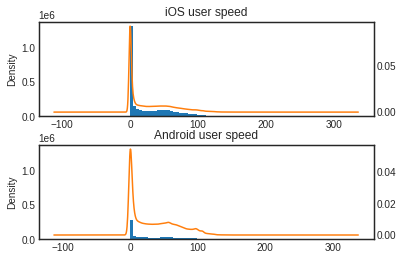

In [29]:
# Plot graph for column "Speed" by "os_version"
plot2(iOS_spd, A_spd, 'speed')

We see that most of the iOS data is concentrated around zero, 
but the speed units are the same with Android data.

In [30]:
# Filter data os_version, Acceleration, Passanger
iOS = TP_OS.loc[TP_OS['os_version'] == 'iOS']
iOS_ap = iOS.loc[TP_OS['TrackOrigin'] == 'Passanger']['Acceleration']
A = TP_OS.loc[TP_OS['os_version'] == 'Android']
A_ap = A.loc[TP_OS['TrackOrigin'] == 'Passanger']['Acceleration']

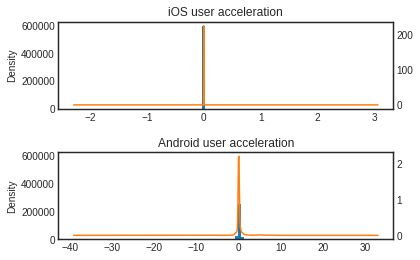

In [31]:
# Plot 2 graph for column "Acceleration" by "os_version"
plot2(iOS_ap, A_ap, 'acceleration')

We see that most of the iOS and Android data is concentrated around zero, there are few non-zero data in the set.

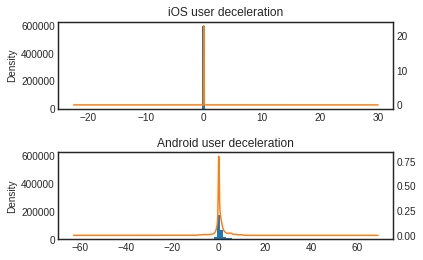

In [32]:
# Plot graph for column "Deceleration" by "os_version"
iOS_dp = iOS.loc[TP_OS['TrackOrigin'] == 'Passanger']['Deceleration']
A_dp = A.loc[TP_OS['TrackOrigin'] == 'Passanger']['Deceleration']

plot2(iOS_dp, A_dp, 'deceleration')

We see that most of the iOS and Android data is concentrated around zero, there are few non-zero data in the set.

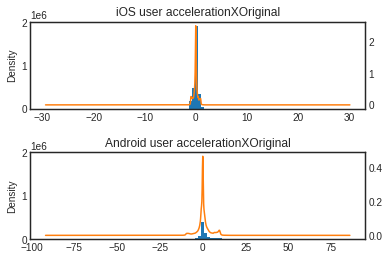

In [33]:
# Plot graph for column "AccelerationXOriginal" by "os_version"
iOS_aX = TP_OS.loc[TP_OS['os_version'] == 'iOS']['AccelerationXOriginal']
A_aX = TP_OS.loc[TP_OS['os_version'] == 'Android']['AccelerationXOriginal']

plot2(iOS_aX, A_aX, 'accelerationXOriginal')

We see that most of the iOS and Android data is concentrated around zero, the accelerationX units are the diffrent.

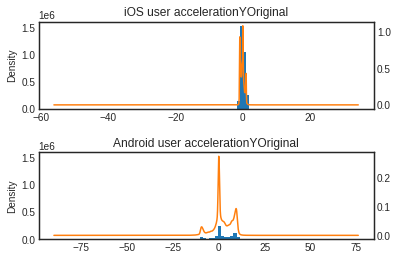

In [34]:
# Plot graph for column "AccelerationYOriginal" by "os_version"
iOS_aY = TP_OS.loc[TP_OS['os_version'] == 'iOS']['AccelerationYOriginal']
A_aY = TP_OS.loc[TP_OS['os_version'] == 'Android']['AccelerationYOriginal']

plot2(iOS_aY, A_aY, 'accelerationYOriginal')

We see that most of the iOS and Android data is concentrated around zero, the accelerationY units are the diffrent.

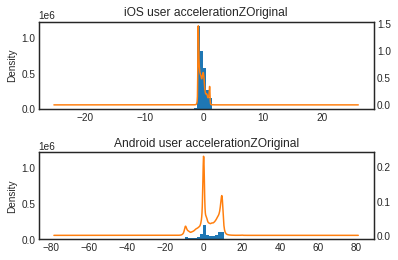

In [35]:
# Plot graph for column "AccelerationZOriginal" by "os_version"
iOS_aZ = TP_OS.loc[TP_OS['os_version'] == 'iOS']['AccelerationZOriginal']
A_aZ = TP_OS.loc[TP_OS['os_version'] == 'Android']['AccelerationZOriginal']

plot2(iOS_aZ, A_aZ, 'accelerationZOriginal')

We see that most of the iOS and Android data is concentrated around zero, the accelerationZ units are the diffrent.

In [36]:
#Columns with diffrent units
columns = ['AccelerationXOriginal','AccelerationYOriginal','AccelerationZOriginal']

In [37]:
#Divide Android data Acceleration X,Y,Z to convert m/s**2 to gfrorce:
TP_OS.loc[TP_OS['os_version'] == 'Android', 'AccelerationXOriginal'] =\
TP_OS[TP_OS['os_version']=='Android']['AccelerationXOriginal'].apply(lambda x: x/9.81)

TP_OS.loc[TP_OS['os_version'] == 'Android', 'AccelerationYOriginal'] =\
TP_OS[TP_OS['os_version']=='Android']['AccelerationYOriginal'].apply(lambda x: x/9.81)

TP_OS.loc[TP_OS['os_version'] == 'Android', 'AccelerationZOriginal'] =\
TP_OS[TP_OS['os_version']=='Android']['AccelerationZOriginal'].apply(lambda x: x/9.81)

In [38]:
#Filеr data by os_version
iOSс = TP_OS.loc[TP_OS['os_version'] == 'iOS']
Aс = TP_OS.loc[TP_OS['os_version'] == 'Android']

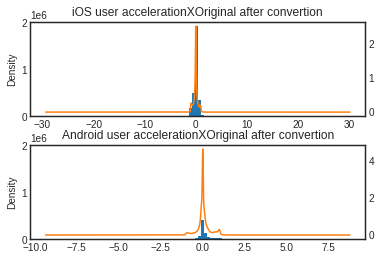

In [39]:
# Plot graph for column "AccelerationXOriginal" by "os_version" after convertion
iOS_aXc = TP_OS.loc[TP_OS['os_version'] == 'iOS', ['AccelerationXOriginal']]
A_aXc = TP_OS.loc[TP_OS['os_version'] == 'Android', ['AccelerationXOriginal']]

plot2(iOS_aXc,A_aXc,'accelerationXOriginal after convertion')

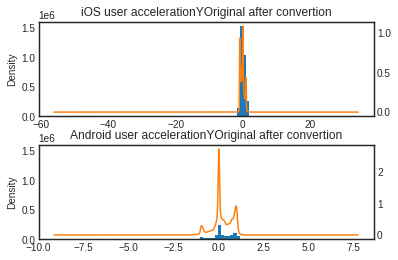

In [40]:
# Plot graph for column "AccelerationYOriginal" by "os_version" after convertion
iOS_aYc = TP_OS.loc[TP_OS['os_version'] == 'iOS', ['AccelerationYOriginal']]
A_aYc = TP_OS.loc[TP_OS['os_version'] == 'Android', ['AccelerationYOriginal']]

plot2(iOS_aYc,A_aYc,'accelerationYOriginal after convertion')

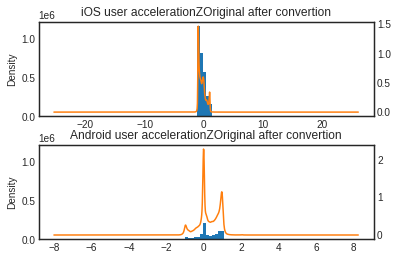

In [41]:
# Plot graph for column "AccelerationZOriginal" by "os_version" after convertion
iOS_aZc = TP_OS.loc[TP_OS['os_version'] == 'iOS', ['AccelerationZOriginal']]
A_aZc = TP_OS.loc[TP_OS['os_version'] == 'Android', ['AccelerationZOriginal']]

plot2(iOS_aZc,A_aZc,'accelerationZOriginal after convertion')

In [ ]:
#Save data to csv
TP_OS.to_csv('/content/drive/MyDrive/test/inc_points_c.csv')